# Título (pensar)

**Declaración de dependencias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

**Obtención de dataset**

In [2]:
df_avocado = pd.read_csv("./datasets/avocado_ripeness_dataset.csv")
df_avocado.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


## Descripción del dataset y análisis estadístico

### Variables medidas

In [3]:
df_avocado.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

### Valores únicos y nans

In [4]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


El dataset está completo, sin valores nulos, y cada variable tiene el nivel de medición acorde. La ficha sugiere también computar la **densidad**, que es el cociente entre peso y tamaño. Como el peso está en gramos y el tamaño en centímetros cúbicos, la densidad será g/cm<sup>3</sup> :

In [5]:
df_avocado["density"] = df_avocado["weight_g"] / df_avocado["size_cm3"]

---

### Medidas de tendencia central y dispersión

In [6]:
df_avocado.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000,1.183738
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564,0.510849
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000,0.537415
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000,0.758929
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000,1.057726
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000,1.536703
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000,2.544554


### Rango intercuartílico y desvío estándar

In [7]:
def filtrar_iqr(df:pd.DataFrame, numeric_cols: list[str], factor:float = 1.5) -> pd.DataFrame:
    """Recibe un dataframe y una lista de columnas numéricas para aplicar el IQR. Por defecto el `factor` es 1.5
    pero puede cambiarse. El df en cuestión se copia

    Args:
        df (pd.DataFrame): pandas.Dataframe
        numeric_cols (list): Lista de columnas numéricas
        factor (float, optional): Factor de escalamiento de IQR. Defaultea a 1.5.

    Returns:
        pd.Dataframe: Copia del df original sin los registros que tengan outliers en alguna de las variables
    """
    _df = df.copy()
    for col in numeric_cols:
        q1 = _df[col].quantile(0.25)
        q3 = _df[col].quantile(0.75)
        iqr = (q3 - q1) * factor
        umbral_min = _df[col] > (q1 - iqr)
        umbral_max = _df[col] < (q3 + iqr)
        _df[col] = _df[col][umbral_min & umbral_max]
    return _df.dropna()

def filtrar_std(df:pd.DataFrame, numeric_cols: list[str], umbral:int = 3) -> pd.DataFrame:
    """Recibe un dataframe y una lista de columnas numéricas para filtrar los valores por fuera de `umbral` desvíos estándar de la media. Por defecto el `umbral` es 3
    pero puede cambiarse. El df en cuestión se copia

    Args:
        df (pd.DataFrame): pandas.Dataframe
        numeric_cols (list): Lista de columnas numéricas
        umbral (int, optional): Umbral de desvíos estándar. Defaultea a 3.

    Returns:
        pd.Dataframe: Copia del df original sin los registros que tengan outliers en alguna de las variables
    """
    _df = df.copy()
    for col in numeric_cols:
        std = _df[col].std()
        media = _df[col].mean()
        umbral_min = _df[col] > (media - (std * umbral))
        umbral_max = _df[col] < (media + (std * umbral))
        _df[col] = _df[col][umbral_min & umbral_max]
    return _df.dropna()

variables_numericas_train = [col for col in df_avocado.select_dtypes(np.number).columns]

df_avocado = filtrar_iqr(df_avocado, variables_numericas_train)
df_avocado

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,density
0,14.5,19,40,26,black,34,175,261,ripe,0.670498
1,71.7,53,69,75,green,69,206,185,pre-conditioned,1.113514
2,88.5,60,94,46,dark green,79,220,143,hard,1.538462
3,93.8,105,87,41,dark green,75,299,140,hard,2.135714
4,42.5,303,58,32,purple,63,200,227,breaking,0.881057
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,1.895522
246,21.6,17,36,19,black,47,182,240,firm-ripe,0.758333
247,14.0,4,40,17,black,37,188,274,ripe,0.686131
248,61.5,63,87,75,green,65,261,162,pre-conditioned,1.611111


El dataframe no tiene outliers por IQR en ninguna de sus variables numéricas

In [8]:
df_avocado = filtrar_std(df_avocado, variables_numericas_train)
df_avocado.describe()


,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000,1.183738
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564,0.510849
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000,0.537415
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000,0.758929
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000,1.057726
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000,1.536703
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000,2.544554


No hay valores que se vayan de 3 desvíos estándar de la media

---

## Variable target

La variable target tiene cinco categorías de madurez

In [9]:
df_avocado["ripeness"].unique()

array(['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'],
      dtype=object)

In [10]:
df_avocado["ripeness"].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

Sus valores son balanceados idénticamente. Pero hay que binarizar el output. Para eso, se considerará que la fruta está madura si es *ripe* o *firm-ripe*

In [11]:
df_avocado["ripeness_binary"] = df_avocado["ripeness"].map(lambda status: 1 if status in ["ripe", "firm-ripe"] else 0)
df_avocado["ripeness_binary"].value_counts()

ripeness_binary
0    150
1    100
Name: count, dtype: int64

Ahora las categorías están sesgadas en favor de los no maduros, pero es esperable

### Análisis de correlación


In [12]:

df_avocado.select_dtypes(include=np.number).corr()


,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density,ripeness_binary
firmness,1.000000,0.038071,0.807693,0.712119,0.951817,0.743636,-0.943758,0.898231,-0.855707
hue,0.038071,1.000000,0.204663,0.172986,0.150709,0.077141,-0.035083,-0.053673,-0.277797
saturation,0.807693,0.204663,1.000000,0.681025,0.803399,0.631171,-0.808331,0.758235,-0.729097
brightness,0.712119,0.172986,0.681025,1.000000,0.680530,0.557013,-0.707422,0.621426,-0.717376
sound_db,0.951817,0.150709,0.803399,0.680530,1.000000,0.735709,-0.925431,0.859241,-0.862350
weight_g,0.743636,0.077141,0.631171,0.557013,0.735709,1.000000,-0.722762,0.838622,-0.683134
size_cm3,-0.943758,-0.035083,-0.808331,-0.707422,-0.925431,-0.722762,1.000000,-0.941288,0.811486
density,0.898231,-0.053673,0.758235,0.621426,0.859241,0.838622,-0.941288,1.000000,-0.726403
ripeness_binary,-0.855707,-0.277797,-0.729097,-0.717376,-0.862350,-0.683134,0.811486,-0.726403,1.000000


In [13]:
df_avocado.select_dtypes(include=np.number).corr()["ripeness_binary"]

firmness          -0.855707
hue               -0.277797
saturation        -0.729097
brightness        -0.717376
sound_db          -0.862350
weight_g          -0.683134
size_cm3           0.811486
density           -0.726403
ripeness_binary    1.000000
Name: ripeness_binary, dtype: float64

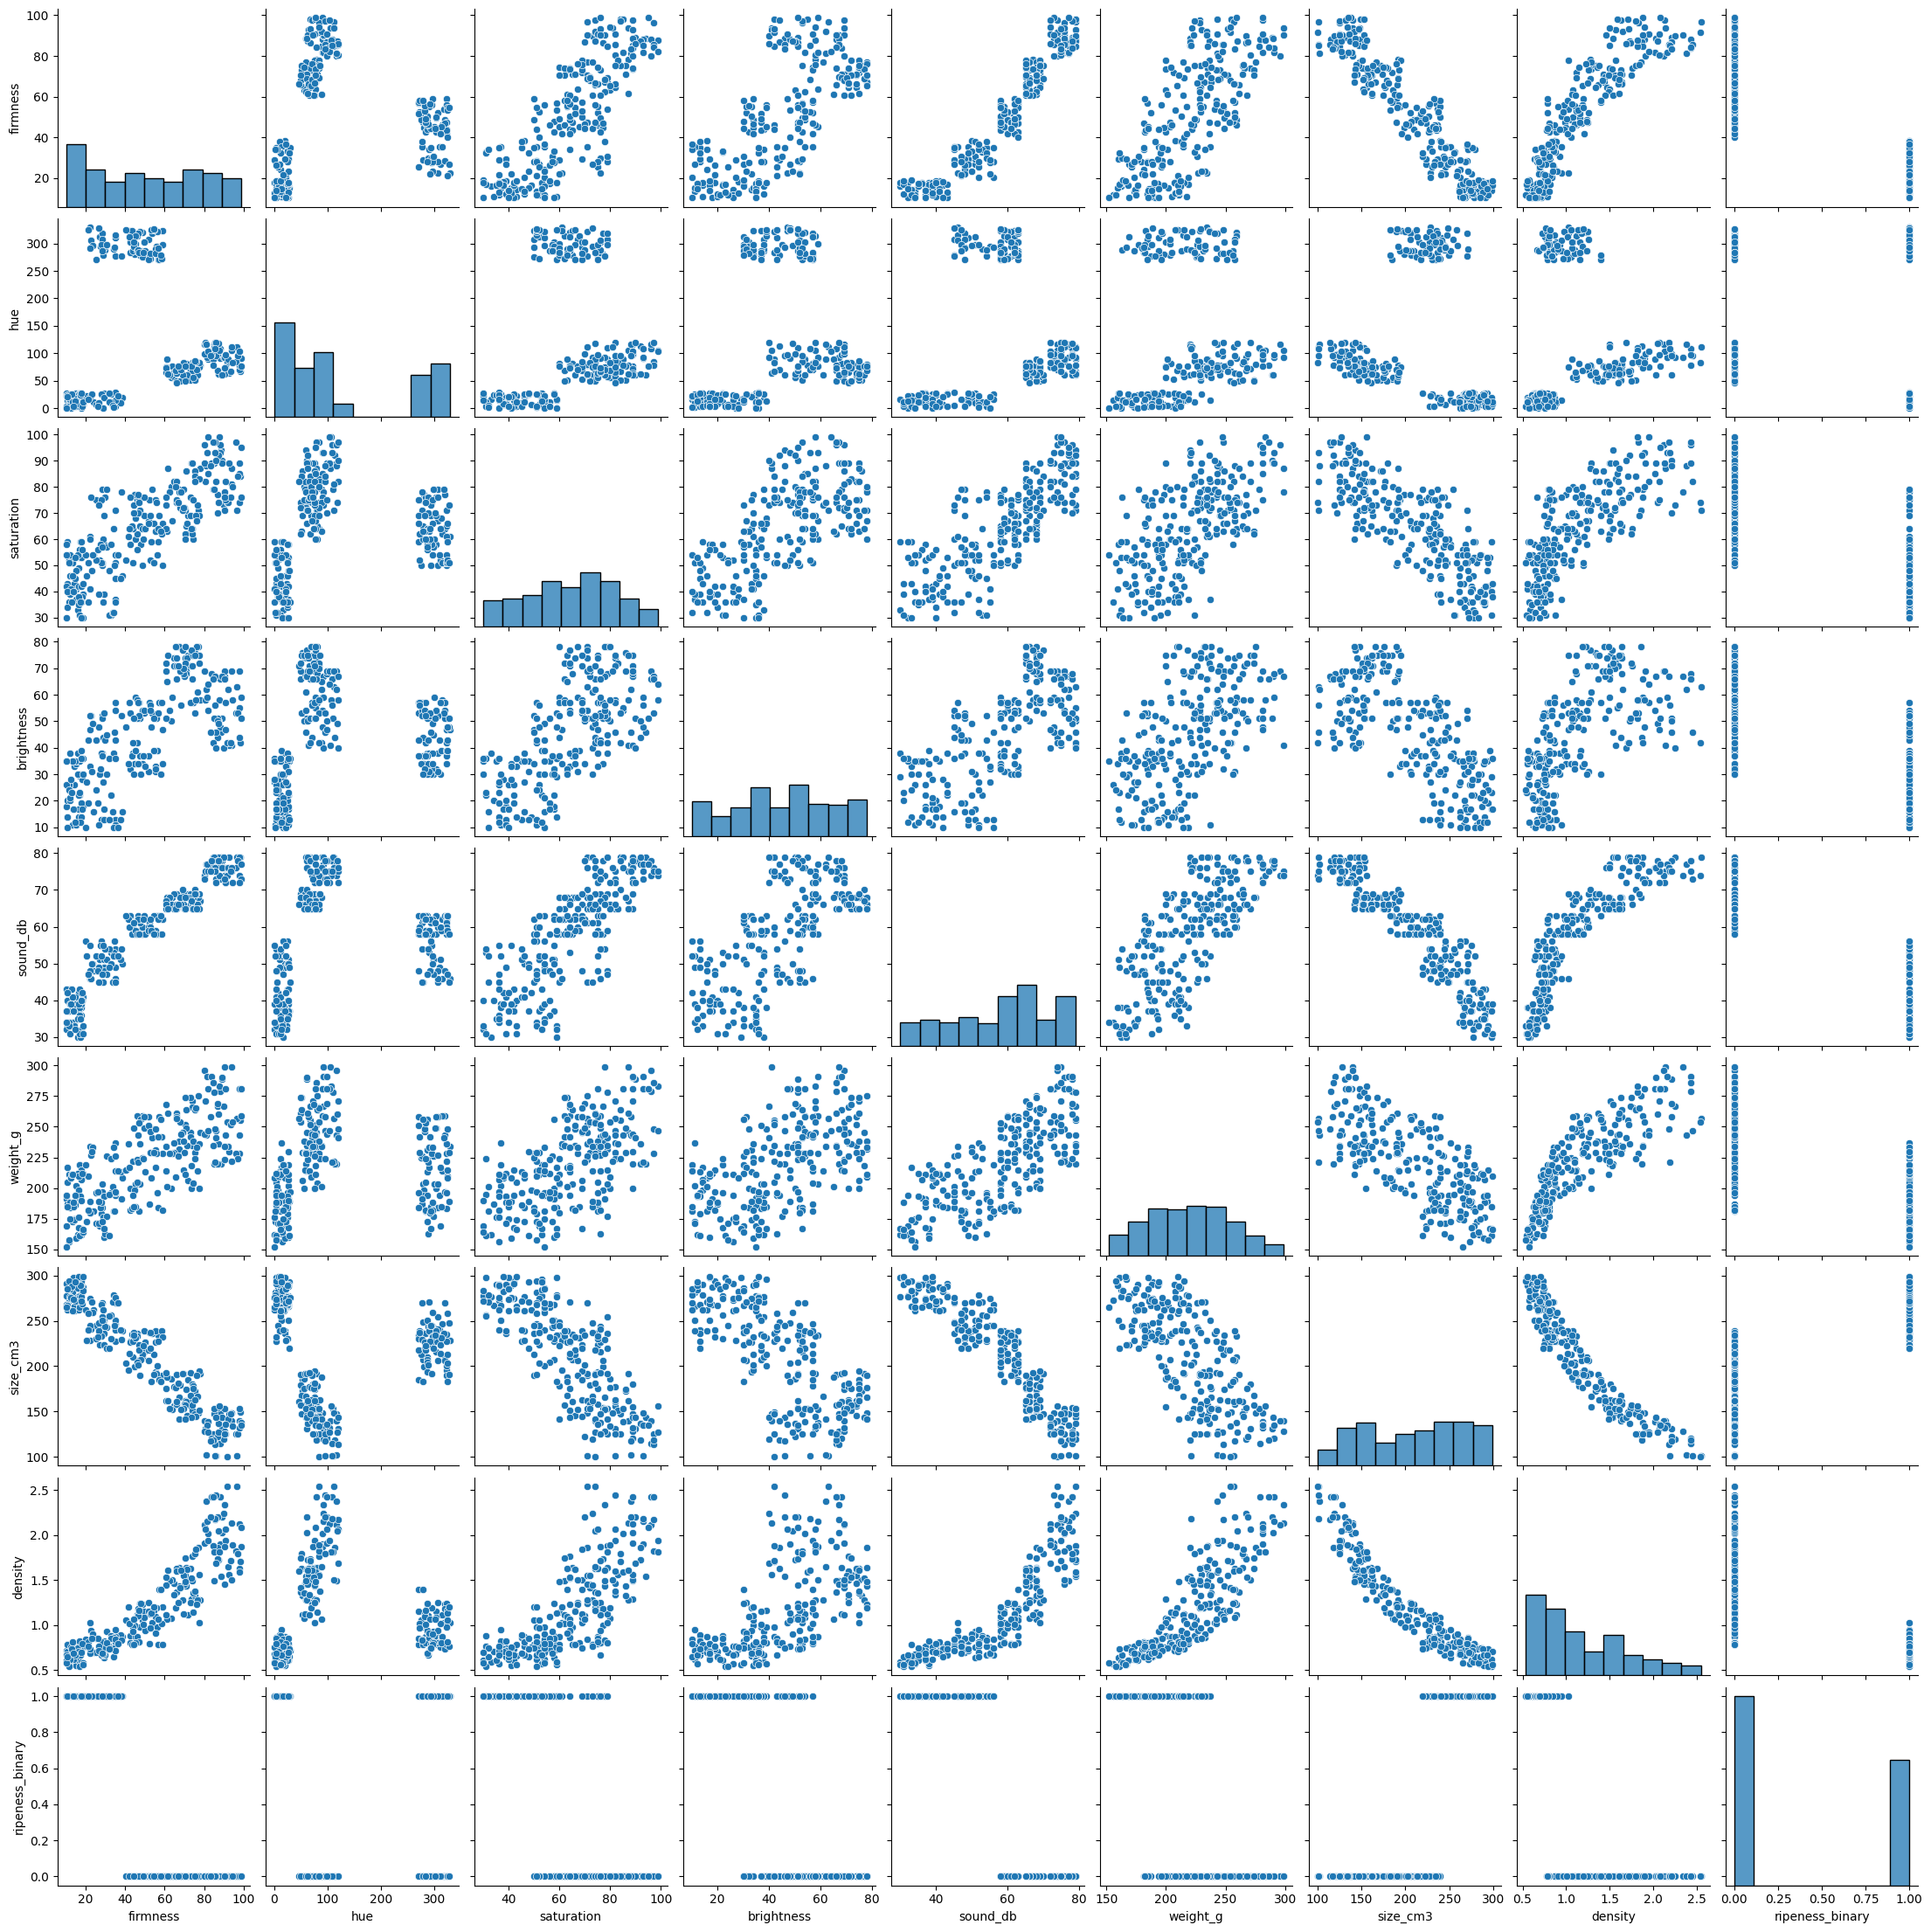

In [14]:
sns.pairplot(df_avocado)

### Selección de variables y encoding

In [15]:
def normalizador_max(valor:np.number, maximo:np.number)->np.number:
    return  valor / maximo

def normalizador_estandar(valor:np.number, media:np.number, desvio_estandar:np.number)->np.number:
    return (valor-media)/desvio_estandar

In [16]:
#Justificar por qué estas
df_avocado_features = df_avocado[["firmness", "hue", "saturation", "brightness", "sound_db", "density"]] 
df_avocado_target = df_avocado["ripeness_binary"]

In [17]:
#Encodings alternativos
df_avocado_features_max = df_avocado_features.copy()
df_avocado_features_std = df_avocado_features.copy()
for col in df_avocado_features.columns:
    df_avocado_features_max[col] = df_avocado_features_max[col].apply(
        normalizador_max,args=(df_avocado_features_max[col].max(),)
        )
    df_avocado_features_std[col] = df_avocado_features_std[col].apply(
        normalizador_estandar, args=(df_avocado_features_std[col].mean(),df_avocado_features_std[col].std())
        )
    


In [18]:
df_avocado_features_max

,firmness,hue,saturation,brightness,sound_db,density
0,0.146761,0.057751,0.404040,0.333333,0.430380,0.263503
1,0.725709,0.161094,0.696970,0.961538,0.873418,0.437606
2,0.895749,0.182371,0.949495,0.589744,1.000000,0.604609
3,0.949393,0.319149,0.878788,0.525641,0.949367,0.839327
4,0.430162,0.920973,0.585859,0.410256,0.797468,0.346252
...,...,...,...,...,...,...
245,0.952429,0.252280,0.808081,0.743590,0.911392,0.744933
246,0.218623,0.051672,0.363636,0.243590,0.594937,0.298022
247,0.141700,0.012158,0.404040,0.217949,0.468354,0.269647
248,0.622470,0.191489,0.878788,0.961538,0.822785,0.633160


In [19]:
df_avocado_features_std

,firmness,hue,saturation,brightness,sound_db,density
0,-1.324101,-0.912977,-1.401611,-0.997683,-1.735495,-1.004679
1,0.772852,-0.622720,0.267248,1.565576,0.793749,-0.137466
2,1.388740,-0.562962,1.705919,0.048545,1.516390,0.694381
3,1.583038,-0.178798,1.303091,-0.213012,1.227334,1.863518
4,-0.297621,1.511521,-0.365768,-0.683815,0.360164,-0.592504
...,...,...,...,...,...,...
245,1.594036,-0.366611,0.900263,0.676282,1.010541,1.393336
246,-1.063815,-0.930051,-1.631799,-1.363863,-0.796062,-0.832739
247,-1.342431,-1.041031,-1.401611,-1.468486,-1.518703,-0.974077
248,0.398920,-0.537351,1.303091,1.565576,0.504693,0.836594


In [20]:
from sklearn.model_selection import train_test_split

trainsets = {}

X_train, X_test, Y_train, Y_test = train_test_split(df_avocado_features_std, df_avocado_target, test_size=1/3, random_state=42)
trainsets["max"] = {"X_train":X_train, "X_test":X_test, "Y_train":Y_train, "Y_test": Y_test}
X_train, X_test, Y_train, Y_test = train_test_split(df_avocado_features_max, df_avocado_target, test_size=1/3, random_state=42)
trainsets["std"] = {"X_train":X_train, "X_test":X_test, "Y_train":Y_train, "Y_test": Y_test}

## Entrenamiento de la red neuronal

TODO: hacer 

### Clasificador

In [21]:
def sigmoide(x) -> np.number:
    return 1 / (1 + np.exp(-x))

def dx_sigmoide(x) -> np.number:
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

def relu(x) -> np.number:
    return np.maximum(x, 0)

def dx_relu(x) -> bool:
    return x > 0

class AvocadoPerceptron():
    def __init__(self, variables: int, neuronas: int, salidas: int, random_state:int = 42) -> None:
        self._generador = np.random.seed(random_state)
        self.variables = variables
        self.neuronas = neuronas
        self.salidas = salidas
        #Era NEURONAS POR VARIABLES
        self.peso_oculto = np.random.rand(neuronas, variables)
        self.sesgo_oculto = np.random.rand(neuronas, 1)
        self.peso_salida = np.random.rand(salidas, neuronas)
        self.sesgo_salida = np.random.rand(salidas, 1)
        self.learning_rate = 0.001

    def _propagar_adelante(self, vector_entrada) -> dict[str,np.ndarray]:
        #Traspongo el vector de entrada para poder hacer la multiplicacion matricial
        vector_entrada_traspuesto = vector_entrada.T
        #Capa oculta numero 1 sin activar
        Z1 = self.peso_oculto @ vector_entrada_traspuesto + self.sesgo_oculto
        #Activación de Z1
        A1 = relu(Z1)
        #La salida activada de Z1 se pasa como parámetro a Z2
        Z2 = self.peso_salida @ A1 + self.sesgo_salida
        #La predicción consiste en la activación de Z2
        A2 = sigmoide(Z2)
        # for name,shape in {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}.items():
        #     print(name,shape.shape)
        return {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2} 
    
    def predecir(self,vector_entrada, umbral:float = 0.5) -> np.number:
        pred = self._propagar_adelante(vector_entrada).get("A2") >= umbral
        return pred.astype(int).item()
        
    def getPesos(self):
        print("self.peso_oculto",self.peso_oculto,"self.sesgo_oculto",self.sesgo_oculto,"self.peso_salida",self.peso_salida,"self.sesgo_oculto",self.sesgo_oculto)
    
    def reajustar_pesos(self,pesos: dict) -> None:
        # print("###")
        # print("self.peso_oculto",self.peso_oculto.shape,"self.sesgo_oculto",self.sesgo_oculto.shape,"self.peso_salida",self.peso_salida.shape,"self.sesgo_oculto",self.sesgo_oculto.shape)
        # print("PRE")
        # self.getPesos()
        self.peso_oculto -= self.learning_rate * pesos.get("WH")
        self.sesgo_oculto -= self.learning_rate * pesos.get("BH")
        # self.peso_salida -= self.learning_rate * pesos.get("WO").T
        self.peso_salida -= self.learning_rate * pesos.get("WO")
        self.sesgo_oculto -= self.learning_rate * pesos.get("BO")
        # print("POST")
        # self.getPesos()
   
    def entrenar(self, vector_entrada, Y) -> dict[str,np.ndarray]: 
        """Entrenar la red consiste en propagar hacia atrás.Esto implica reajustar los pesos de las predicciones desde la salida hacia atrás.
        Por lo tanto, la función de costo toma la forma `C = (A2 - y)**2` =  y las sucesivas derivadas parciales son:
        - dC_A2 > dA2_Z2 > dZ2_WO > dZ2_BO > dZ2_A1 > dA1_Z1 > dZ1_WH > dZ1_BH > dWH_X  
        """
        base = self._propagar_adelante(vector_entrada)
        dC_A2 = 2*(base.get("A2") - Y)
        dA2_Z2 = dx_sigmoide(base.get("Z2"))
        dZ2_WO = base.get("A1")
        dZ2_A1 = self.peso_salida
        dZ2_BO = 1
        dA1_Z1 = dx_relu(base.get("Z1"))
        dZ1_WH = vector_entrada.T
        dZ1_BH = 1
        # print("---")
        # for k,v in {"dC_A2":dC_A2,"dA2_Z2":dA2_Z2,"dZ2_WO":dZ2_WO,"dZ2_A1":dZ2_A1,"dZ2_BO":dZ2_BO,"dA1_Z1":dA1_Z1,"dZ1_WH":dZ1_WH,"dZ1_BH":dZ1_BH}.items():
        #     try:
        #         print(k,v.shape)
        #     except:
        #         print(k,v)

        dC_dW2 = dC_A2 @ dA2_Z2 @ dZ2_WO.T

        dC_dB2 = dC_A2 @ dA2_Z2 * dZ2_BO

        dC_dA1 = dC_A2 @ dA2_Z2 @ dZ2_A1

        dC_dW1 = dC_dA1 @ dA1_Z1 @ dZ1_WH.T

        dC_dB1 = dC_dA1 @ dA1_Z1 * dZ1_BH

        # print("+++")
        # for k,v in {"dC_dW2":dC_dW2,"dC_dB2":dC_dB2,"dC_dA1":dC_dA1,"dC_dB1":dC_dB1,"dC_dW1":dC_dW1}.items():
        #     print(k,v.shape)
        self.reajustar_pesos({"WO":dC_dW2, "BO":dC_dB2, "WH":dC_dW1, "BH":dC_dB1})


cls = AvocadoPerceptron(6,6,1)

#Prueba predecir sin entrenar
registro = trainsets.get("max").get("X_train").head(1).values
cls.predecir(registro)



1

---

### Entrenando con el de max

In [22]:
# Función para ver exactitud por umbral

def umbral_optimo(df_x_train, df_y_train, modelo):
    rangos = [i/10 for i in range(1, 10, 1)]
    predictores = {}
    for rango in rangos:
        preds = []
        for i in df_x_train.values:
            preds.append(modelo.predecir(i.reshape(1,modelo.variables),rango))
        predicciones = pd.Series(preds,index=df_y_train.index,name="Predicciones")
        comp = pd.DataFrame([df_y_train,predicciones]).T
        comp["hits"] = comp.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)
        predictores[str(rango)] = comp
    return predictores


In [23]:
#Entrena al modelo por 100_000 iteraciones
for i in range (100_000):
    inp = trainsets.get("max").get("X_train").sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    cls.entrenar(inp.values,pred)

In [24]:
df_avocado

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,density,ripeness_binary
0,14.5,19,40,26,black,34,175,261,ripe,0.670498,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,1.113514,0
2,88.5,60,94,46,dark green,79,220,143,hard,1.538462,0
3,93.8,105,87,41,dark green,75,299,140,hard,2.135714,0
4,42.5,303,58,32,purple,63,200,227,breaking,0.881057,0
...,...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,1.895522,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,0.758333,1
247,14.0,4,40,17,black,37,188,274,ripe,0.686131,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,1.611111,0


In [25]:
#Iteramos para ver el mejor umbral para predecir el valor
rangos = [i/10 for i in range(1, 10, 1)]
predictores = {}
for rango in rangos:
    preds = []
    for i in trainsets.get("max").get("X_train").values:
        preds.append(cls.predecir(i.reshape(1,6),rango))
    predicciones = pd.Series(preds,index=trainsets.get("max").get("Y_train").index,name="Predicciones")
    comp = pd.DataFrame([trainsets.get("max").get("Y_train"),predicciones]).T
    comp["hits"] = comp.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)
    predictores[str(rango)] = comp


In [26]:
umbrales = umbral_optimo(trainsets.get("max").get("X_train"), trainsets.get("max").get("Y_train"), cls)

In [27]:
# for threshold, df_ in predictores.items():
#     print(threshold, " accuracy:", round(df_["hits"].sum() / df_["hits"].shape[0],3))
for threshold, df_ in umbrales.items():
    print(threshold, " accuracy:", round(df_["hits"].sum() / df_["hits"].shape[0],3))

0.1  accuracy: 0.898
0.2  accuracy: 0.97
0.3  accuracy: 0.994
0.4  accuracy: 1.0
0.5  accuracy: 0.988
0.6  accuracy: 0.952
0.7  accuracy: 0.669
0.8  accuracy: 0.645
0.9  accuracy: 0.596


In [28]:
preds_test = []
for i in trainsets.get("max").get("X_test").values:
    preds_test.append(cls.predecir(i.reshape(1,6), 0.5))
predicciones_test = pd.Series(preds_test,index=trainsets.get("max").get("Y_test").index,name="Predicciones")
comp_test = pd.DataFrame([trainsets.get("max").get("Y_test"),predicciones_test]).T
comp_test["hits"] = comp_test.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)

print(" accuracy:", comp_test["hits"].sum() / comp_test["hits"].shape[0])

 accuracy: 1.0


### Entrenando con std

In [29]:
#Entrena al modelo por 100_000 iteraciones
cls_std = AvocadoPerceptron(6,6,1)
for i in range (100_000):
    inp = trainsets.get("std").get("X_train").sample(1)
    pred = trainsets.get("std").get("Y_train")[inp.index[0]]
    cls_std.entrenar(inp.values,pred)

In [30]:
#Iteramos para ver el mejor umbral para predecir el valor
rangos = [i/10 for i in range(5, 10, 1)]
predictores = {}
for rango in rangos:
    preds = []
    for i in trainsets.get("std").get("X_train").values:
        preds.append(cls_std.predecir(i.reshape(1,6),rango))
    predicciones = pd.Series(preds,index=trainsets.get("std").get("Y_train").index,name="Predicciones")
    comp = pd.DataFrame([trainsets.get("std").get("Y_train"),predicciones]).T
    comp["hits"] = comp.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)
    predictores[str(rango)] = comp


In [31]:
for threshold, df_ in predictores.items():
    print(threshold, " accuracy:", round(df_["hits"].sum() / df_["hits"].shape[0],3))

0.5  accuracy: 0.916
0.6  accuracy: 0.789
0.7  accuracy: 0.596
0.8  accuracy: 0.596
0.9  accuracy: 0.596


In [32]:
preds_test = []
for i in trainsets.get("max").get("X_test").values:
    preds_test.append(cls_std.predecir(i.reshape(1,6),0.5))
predicciones_test = pd.Series(preds_test,index=trainsets.get("max").get("Y_test").index,name="Predicciones")
comp_test = pd.DataFrame([trainsets.get("max").get("Y_test"),predicciones_test]).T
comp_test["hits"] = comp_test.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)

print(" accuracy:", comp_test["hits"].sum() / comp_test["hits"].shape[0])

 accuracy: 0.8571428571428571


---

### Reduciendo variables

### Prediciendo solo con el sonido

In [33]:
sonido = trainsets.get("max").get("X_train")[["sound_db"]] # X_train
sonidoTest = trainsets.get("max").get("X_test")[["sound_db"]] # X_test

perceptronSonido = AvocadoPerceptron(1, 6, 1)

perceptronSonido.predecir(sonido.sample(1).values)

for i in range (100_000):
    inp = sonido.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptronSonido.entrenar(inp.values,pred)

In [39]:
#Iteramos para ver el mejor umbral para predecir el valor

predictores = umbral_optimo(sonido, trainsets.get("max").get("Y_train"), perceptronSonido)


In [40]:
for threshold, df_ in predictores.items():
    print(threshold, " accuracy:", round(df_["hits"].sum() / df_["hits"].shape[0],3))

0.1  accuracy: 0.711
0.2  accuracy: 0.898
0.3  accuracy: 0.934
0.4  accuracy: 1.0
0.5  accuracy: 0.982
0.6  accuracy: 0.952
0.7  accuracy: 0.898
0.8  accuracy: 0.831
0.9  accuracy: 0.753


In [43]:
# Ahora vemos para la prueba

tests = umbral_optimo(sonidoTest, trainsets.get("max").get("Y_test"), perceptronSonido)

for threshold, df_ in tests.items():
    print(threshold, " accuracy:", round(df_["hits"].sum() / df_["hits"].shape[0],3))


0.1  accuracy: 0.69
0.2  accuracy: 0.845
0.3  accuracy: 0.952
0.4  accuracy: 1.0
0.5  accuracy: 0.964
0.6  accuracy: 0.952
0.7  accuracy: 0.893
0.8  accuracy: 0.845
0.9  accuracy: 0.786


### Firmeza